<a id='Desc'></a>
# Telecom Plan Statistical Data Analysis

## Project Description

- We work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

- We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Our job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

<a id='plans'></a>
## Description of the plans

**Note:** Megaline rounds seconds up to minutes, and megabytes to gigabytes. 

- For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 

- For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**Surf**

- Monthly charge: 20 USD

- 500 monthly minutes, 50 texts, and 15 GB of data

- After exceeding the package limits:

- 1 minute: 3 cents

- 1 text message: 3 cents

- 1 GB of data: 10 USD

**Ultimate**

- Monthly charge: 70 USD

- 3000 monthly minutes, 1000 text messages, and 30 GB of data

- After exceeding the package limits:

- 1 minute: 1 cent

- 1 text message: 1 cent

- 1 GB of data: 7 USD

<a id='dataset'></a>
## Description of the data

Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. 

Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.


The *users* table (data on users):

- **user_id** — unique user identifier

- **first_name** — user's name

- **last_name** — user's last name

- **age** — user's age (years)

- **reg_date** — subscription date (dd, mm, yy)

- **churn_date** — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)

- **city** — user's city of residence

- **plan** — calling plan name


The *calls* table (data on calls):

- **id** — unique call identifier

- **call_date** — call date

- **duration** — call duration (in minutes)

- **user_id** — the identifier of the user making the call


The *messages* table (data on texts):

- **id** — unique text message identifier

- **message_date** — text message date

- **user_id** — the identifier of the user sending the text


The *internet* table (data on web sessions):

- **id** — unique session identifier

- **mb_used** — the volume of data spent during the session (in megabytes)

- **session_date** — web session date

- **user_id** — user identifier


The *plans* table (data on the plans):

- **plan_name** — calling plan name

- **usd_monthly_fee** — monthly charge in US dollars

- **minutes_included** — monthly minute allowance

- **messages_included** — monthly text allowance

- **mb_per_month_included** — data volume allowance (in megabytes)

- **usd_per_minute** — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st 
minute will be charged)

- **usd_per_message** — price per text after exceeding the package limits

- **usd_per_gb** — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

<a id='Sections'></a>
# Sections

[Project Description](#Desc)


[Description of the plans](#plans)


[Description of the data](#dataset)


[Step 1. Open the data file and study the general information](#Step1)

- [1.1. General information about 'calls_data' dataset](#1.1.)
- [1.2. General information about 'internet_data' dataset](#1.2.)
- [1.3. General information about 'text_data' dataset](#1.3.)
- [1.4. General information about 'plans_data' dataset](#1.4.)
- [1.5. General information about 'users_data' dataset](#1.5.)
- [1.6. Step Conclusion](#1.6.)


[Step 2. Prepare the data](#Step2)

- [2.1. Merging the tables](#2.1.)
- [2.2. Filling the missing values](#2.2.)
- [2.3. Calculating revenue](#2.3.)
- [2.3. Step Conclusion](#2.4.)


[Step 3. Analyze the data](#Step3)

- [3.1. New tables according to the plans](#3.1.)
- [3.2. Density histograms for main parameters](#3.2.)
- [3.3. Step Conclusion](#3.3.)


[Step 4. Test the hypotheses ](#Step4)

- [4.1. Hypotheses test by plans](#4.1.)
    - [4.1.1. Levene Test](#4.1.1.)
    - [4.1.2. T-Test](#4.1.2.)
- [4.2. Hypotheses test by region](#4.2.)
    - [4.2.1. Levene Test](#4.1.1.)
    - [4.2.2. T-Test](#4.1.1.)
- [4.3. Step Conclusion](#4.3.)

[Step 5. General Conclusion](#Step5)

<a id='Step1'></a>
# Step 1. Open the data file and study the general information

We will import the required libraries, then we can access to the data files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display

In [2]:
calls_data = pd.read_csv("/datasets/megaline_calls.csv")
internet_data = pd.read_csv("/datasets/megaline_internet.csv")
text_data = pd.read_csv("/datasets/megaline_messages.csv")
plans_data = pd.read_csv("/datasets/megaline_plans.csv")
users_data = pd.read_csv("/datasets/megaline_users.csv")

- We will call the info( ) and head( ) methods to study the datasets. 
- We will study whether there are any duplicated columns, missing values, and check the data types of columns and the unique values of some columns. 
- We will use describe method to get a general information about some columns.

<a id='1.1.'></a>
## 1.1. General information about *'calls_data'* dataset

In [3]:
calls_data.info()
display(calls_data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


In [4]:
display(calls_data.id.duplicated().sum())

0

- All of **'id'** column is unique, there isn't any duplicated column.

In [5]:
display(len(calls_data.user_id.unique()))

481

- There are **'481' unique customers'**. Some customers' data are absent or some of them didn't make any call.

In [6]:
display(calls_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
user_id,137735.0,1247.658046,139.416268,1000.0,1128.00,1247.00,1365.00,1499.0
duration,137735.0,6.745927,5.839241,0.0,1.29,5.98,10.69,37.6


- We need to convert the type of *'call_date'* column to *datetime*.
- We will round the *'duration'* column up and get a new column named *'call_minutes'*.
- We will add a new column named *'call_counts'* to show monthly call counts for each user.

In [7]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
display(calls_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


None

In [8]:
calls_data['call_minutes'] = np.ceil(calls_data['duration']).astype('int')
display(calls_data.head())

,id,user_id,call_date,duration,call_minutes
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


In [9]:
display(calls_data['call_date'].describe(datetime_is_numeric=True))

count                           137735
mean     2018-09-25 19:57:56.319018496
min                2018-01-15 00:00:00
25%                2018-08-08 00:00:00
50%                2018-10-12 00:00:00
75%                2018-11-26 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object

- We converted the type of *'call_date' to 'datetime'*
- We added a new column named *'call_minutes'* because all 'duration' values are rounded up when the revenue is computed. 
- We saw the calls_data belongs to *2018 year*. 
- Now we will add a new *'month'* column.

In [10]:
calls_data['month'] = pd.DatetimeIndex(calls_data['call_date']).month
display(calls_data.head())

,id,user_id,call_date,duration,call_minutes,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12


- We are grouping the table by *'user_id'* and *'month'* to be able see the monthly *'call_minutes'*.

In [11]:
calls_grouped_users = calls_data.groupby(['user_id', 'month'], as_index=False).agg({'call_minutes':'sum'})
display(calls_grouped_users.head())

,user_id,month,call_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


- We will add the *call counts per month* as *'call_counts'*.

In [12]:
calls_grouped_users['call_counts'] = calls_data.groupby(['user_id', 'month'], as_index=False).agg({'id':'count'})['id']
display(calls_grouped_users.head())

,user_id,month,call_minutes,call_counts
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64


- We will take the required columns from the previous table and store them in the new table named *'data_calls'*.

In [13]:
data_calls = pd.DataFrame(calls_grouped_users, columns=['user_id', 'month', 'call_minutes', 'call_counts'])
display(data_calls.head())

,user_id,month,call_minutes,call_counts
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64


<a id='1.2.'></a>
## 1.2. General information about *'internet_data'* dataset

In [14]:
internet_data.info()
display(internet_data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40


In [15]:
display(internet_data.id.duplicated().sum())

0

- All *'id'*s of the internet dataset are unique, there isn't any duplicated column.

In [16]:
display(len(internet_data.user_id.unique()))

489

- There are also **'481' unique** customers.

In [17]:
display(internet_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
user_id,104825.0,1242.496361,142.053913,1000.0,1122.00,1236.00,1367.00,1499.00
mb_used,104825.0,366.713701,277.170542,0.0,136.08,343.98,554.61,1693.47


- We need to convert the type of *'session_date' column to datetime.*
- We will round the *'mb_used'* column up but before we need to find *the usage per month*, so we will group the data by *'user_id'* to find the monthly internet usage.

In [18]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
display(internet_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

In [19]:
display(internet_data['session_date'].describe(datetime_is_numeric=True))

count                           104825
mean     2018-09-26 11:37:55.048890880
min                2018-01-15 00:00:00
25%                2018-08-11 00:00:00
50%                2018-10-13 00:00:00
75%                2018-11-27 00:00:00
max                2018-12-31 00:00:00
Name: session_date, dtype: object

- We will add the *month* column to be able see the monthly usage.

In [20]:
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month
display(internet_data.tail())

,id,user_id,session_date,mb_used,month
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12
104824,1499_219,1499,2018-12-24,758.31,12


- Now we are grouping the table by *'user_id' and 'month'* again.

In [21]:
internet_grouped_user = internet_data.groupby(['user_id', 'month'], as_index=False).agg({'mb_used':'sum'})
internet_grouped_user['monthly_gb'] = (internet_grouped_user['mb_used']/1024).apply(np.ceil).astype('int')
display(internet_grouped_user.head())

,user_id,month,mb_used,monthly_gb
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19


- We grouped the internet data by *'user_id' and 'month'*, then computed *monthly gb usage* and add to the table as *monthly_gb*. 
- We need only *'user_id', 'month', and 'monthly_gb'* columns from this table. 
- Let's store them in a new table named *'data_internet'*.

In [22]:
data_internet = pd.DataFrame(internet_grouped_user, columns=['user_id', 'month', 'monthly_gb'])
display(data_internet.head())

,user_id,month,monthly_gb
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


<a id='1.3.'></a>
## 1.3. General information about *'text_data'* dataset

In [23]:
text_data.info()
display(text_data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31


In [24]:
display(text_data.id.duplicated().sum())

0

- All of the text *'id'*s are unique, there isn't any duplicated column.

In [25]:
display(len(text_data.user_id.unique()))

402

- There are **'402' unique customers'**.

In [26]:
display(text_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
user_id,76051.0,1245.972768,139.843635,1000.0,1123.0,1251.0,1362.0,1497.0


- We need to convert the type of *'message_date'* column **to datetime.**
- We will add a new column named *'month'* to show the months and *text_amount'* to display **the counts of the messages for each user per month.**

In [27]:
text_data['message_date'] = pd.to_datetime(text_data['message_date'], format='%Y-%m-%d')
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [28]:
display(text_data['message_date'].describe(datetime_is_numeric=True))

count                            76051
mean     2018-10-03 23:51:32.172358144
min                2018-01-15 00:00:00
25%                2018-08-22 00:00:00
50%                2018-10-20 00:00:00
75%                2018-12-01 00:00:00
max                2018-12-31 00:00:00
Name: message_date, dtype: object

In [29]:
text_data['month'] = pd.DatetimeIndex(text_data['message_date']).month
display(text_data.tail())

,id,user_id,message_date,month
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12
76050,1497_613,1497,2018-12-23,12


- We will group the table by *'user_id' and 'month'* with ***'agg'*** method **to count the texts number.**

In [30]:
text_grouped_user = text_data.groupby(['user_id', 'month'], as_index=False).agg({'id':'count'})
display(text_grouped_user.head())

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


- We will replace the name of the *'id'* column  as *'text_amount'*.
- We will also name *'data_text'* to the table.

In [31]:
text_grouped_user.rename(columns={'id':'text_amount'}, inplace=True)
data_text = text_grouped_user.copy()
display(data_text.tail())

,user_id,month,text_amount
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11
1805,1497,12,50


We, 
- added the *'month'* column, 
- grouped the data by *'user_id' and 'month'*, 
- computed *the text amounts per month*, 
- and simplified the table.

<a id='1.4.'></a>
## 1.4. General information about *'plans_data'* dataset

In [32]:
plans_data.info()
display(plans_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- We have *surf* and *ultimate* plans in two rows.
- In this table, we are able to see the details of the plans.
- We will rename the columns and correct the internet usage limit **as 15 and 30 GB**, because we converted the MB usages to GB in the previous steps *as divide the MB usages by 1024.* 
- So it shows us the **rounded GB's**, and the plan table has to be show the rounded.

In [33]:
changed_columns = {"messages_included":"text_limit", "mb_per_month_included":"gb_limit", "minutes_included":"call_limit", "usd_per_message":"usd_per_text", "plan_name":"plan"}
plans_data.rename(columns=changed_columns, inplace=True)
plans_data['gb_limit'] = (plans_data['gb_limit']/1024).astype('int')
display(plans_data.head())

,text_limit,gb_limit,call_limit,usd_monthly_pay,usd_per_gb,usd_per_text,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


<a id='1.5.'></a>
## 1.5. General information about *'users_data'* dataset

In [34]:
users_data.info()
display(users_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


- We need to convert the type of the *'reg_date'* and the *'churn_date'* columns **to datetime.**
- There are **many 'NaN' values** in the *'churn_date'* column, it's normal because many users are still going to keep the company. They were still customers, except non-null rows, when the database was accessed. We can add a new column to show a customer's churn status for the plan.
- We will examine the *'age', 'city', 'plan', 'reg_date' and 'churn_date'* columns.

In [35]:
display(users_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,45.486,16.972269,18.0,30.00,46.0,61.00,75.0


- There are **500 customers between 18 and 75 age years old.** 
- Now we are going to convert the *'reg_date' and 'churn_date'* column types **to datetime.*

In [36]:
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [37]:
display(users_data['reg_date'].describe(datetime_is_numeric=True))
display(users_data['churn_date'].describe(datetime_is_numeric=True))

count                           500
mean     2018-06-24 16:30:43.200000
min             2018-01-01 00:00:00
25%             2018-03-25 18:00:00
50%             2018-06-20 00:00:00
75%             2018-09-20 06:00:00
max             2018-12-31 00:00:00
Name: reg_date, dtype: object

count                               34
mean     2018-11-10 22:35:17.647058944
min                2018-07-31 00:00:00
25%                2018-10-08 12:00:00
50%                2018-11-22 12:00:00
75%                2018-12-18 00:00:00
max                2018-12-31 00:00:00
Name: churn_date, dtype: object

- All dates are belong to **2018 year.**
- Churn dates start **from 31-07-2018**

In [38]:
display(users_data['user_id'].duplicated().sum())

0

- There isn't any duplicated row for users. 
- We will check the *city names* with unique method.

In [39]:
display(users_data.city.unique())

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

- Let's see the number of customers for each plan.

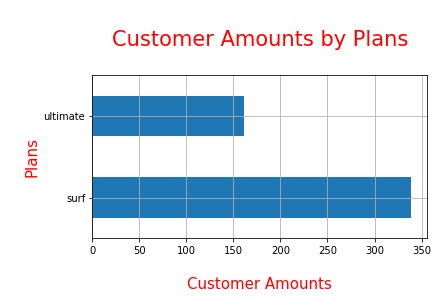

In [40]:
users_data.plan.value_counts().plot.barh(figsize=(6, 3), grid=True)
plt.xlabel('\nCustomer Amounts', size=15, color='r')
plt.ylabel('\nPlans', size=15, color='r')
plt.title('\nCustomer Amounts by Plans\n', size=21, color='r');

- The **'surf'** customers are *more than 2 times* of **'ultimate'** customers. 
- We don't need the *'name' and 'surname'* columns. 
- We will get the required columns to store them in a new dataset named *'users'*.

In [41]:
users = pd.DataFrame(users_data, columns=['user_id', 'age', 'city', 'plan'])
display(users.head())

,user_id,age,city,plan
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,36,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,52,"Tulsa, OK MSA",surf
4,1004,40,"Seattle-Tacoma-Bellevue, WA MSA",surf


<a id='1.6.'></a>
## 1.6. Step Conclusion

- We have got the general information about the datasets and the columns.
- We changed the types of some columns, we made convertion to datetime.
- We added the *'month'* columns on each *usage* dataset.
- We simplified the *usage* datasets with groupby processes.

<a id='Step2'></a>
# Step 2. Prepare the data

- We will merge the datasets with **merge** method. 
- Let's check the tables.

In [42]:
usage_datasets = [data_calls, data_internet, data_text]
[display(x.head()) for x in usage_datasets]

,user_id,month,call_minutes,call_counts
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64


,user_id,month,monthly_gb
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


,user_id,month,text_amount
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


[None, None, None]

In [43]:
display(users.head())

,user_id,age,city,plan
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,36,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,52,"Tulsa, OK MSA",surf
4,1004,40,"Seattle-Tacoma-Bellevue, WA MSA",surf


<a id='2.1.'></a>
## 2.1. Merging the tables

- We will use the merge method to combine the tables.
- We will name *'all_tables'* at the end.

In [44]:
usage_data = data_calls.merge(data_text, on=['user_id', 'month'], how='outer')
usage_data = usage_data.merge(data_internet, on=['user_id', 'month'], how='outer')
display(usage_data.head())

,user_id,month,call_minutes,call_counts,text_amount,monthly_gb
0,1000,12,124.0,16.0,11.0,2.0
1,1001,8,182.0,27.0,30.0,7.0
2,1001,9,315.0,49.0,44.0,14.0
3,1001,10,393.0,65.0,53.0,22.0
4,1001,11,426.0,64.0,36.0,19.0


In [45]:
users_table = usage_data.merge(users, on='user_id', how='left')
display(users_table.head())

,user_id,month,call_minutes,call_counts,text_amount,monthly_gb,age,city,plan
0,1000,12,124.0,16.0,11.0,2.0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,182.0,27.0,30.0,7.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,315.0,49.0,44.0,14.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,393.0,65.0,53.0,22.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,426.0,64.0,36.0,19.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [46]:
all_tables = users_table.merge(plans_data, on='plan', how='left')
display(all_tables.head())

,user_id,month,call_minutes,call_counts,text_amount,monthly_gb,age,city,plan,text_limit,gb_limit,call_limit,usd_monthly_pay,usd_per_gb,usd_per_text,usd_per_minute
0,1000,12,124.0,16.0,11.0,2.0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30,3000,70,7,0.01,0.01
1,1001,8,182.0,27.0,30.0,7.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15,500,20,10,0.03,0.03
2,1001,9,315.0,49.0,44.0,14.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15,500,20,10,0.03,0.03
3,1001,10,393.0,65.0,53.0,22.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15,500,20,10,0.03,0.03
4,1001,11,426.0,64.0,36.0,19.0,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15,500,20,10,0.03,0.03


In [47]:
display(len(all_tables.user_id.unique()))

490

- We merged all of the tables. 
- There are **490 customers in our table**. 
- Now we will **fill the missing values with zeros**, because they show us that **there aren't any usage in these cells.**

<a id='2.2.'></a>
## 2.2. Filling the missing values

In [48]:
display(all_tables.isnull().sum())

user_id              0
month                0
call_minutes        35
call_counts         35
text_amount        487
monthly_gb          16
age                  0
city                 0
plan                 0
text_limit           0
gb_limit             0
call_limit           0
usd_monthly_pay      0
usd_per_gb           0
usd_per_text         0
usd_per_minute       0
dtype: int64

In [49]:
all_tables = all_tables.fillna('0')
display(all_tables.isnull().sum())

user_id            0
month              0
call_minutes       0
call_counts        0
text_amount        0
monthly_gb         0
age                0
city               0
plan               0
text_limit         0
gb_limit           0
call_limit         0
usd_monthly_pay    0
usd_per_gb         0
usd_per_text       0
usd_per_minute     0
dtype: int64

- No more missing values.

In [50]:
all_tables['call_minutes'] = all_tables['call_minutes'].astype('int')
all_tables['text_amount'] = all_tables['text_amount'].astype('int')
all_tables['monthly_gb'] = all_tables['monthly_gb'].astype('int')
display(all_tables.dtypes)

user_id              int64
month                int64
call_minutes         int32
call_counts         object
text_amount          int32
monthly_gb           int32
age                  int64
city                object
plan                object
text_limit           int64
gb_limit             int32
call_limit           int64
usd_monthly_pay      int64
usd_per_gb           int64
usd_per_text       float64
usd_per_minute     float64
dtype: object

- Everything is ok, data is ready for the next steps.

<a id='2.3.'></a>
## 2.3. Calculating revenue

- Now we will define a function **to find the revenue for all customers per month**.
- Then we will apply this function to the table and add a new column named **'revenue_usd'**.

In [51]:
def calc_revenue(row):
    
    fixed_payment = row['usd_monthly_pay']
    
    call_usage = row['call_minutes']
    text_usage = row['text_amount']
    internet_usage = row['monthly_gb']
    
    call_limit = row['call_limit']
    text_limit = row['text_limit']
    internet_limit = row['gb_limit']
    
    usd_per_minute = row['usd_per_minute']
    usd_per_text = row['usd_per_text']
    usd_per_internet = row['usd_per_gb']
    
    call_income = max(0, ((call_usage - call_limit) * usd_per_minute))
    text_income = max(0, ((text_usage - text_limit) * usd_per_text))
    internet_income = max(0, ((internet_usage - internet_limit) * usd_per_internet))
    
    revenue = fixed_payment + call_income + text_income + internet_income
    
    return revenue 

In [52]:
all_tables['revenue_usd'] = all_tables.apply(calc_revenue, axis=1)
display(all_tables.head())

,user_id,month,call_minutes,call_counts,text_amount,monthly_gb,age,city,plan,text_limit,gb_limit,call_limit,usd_monthly_pay,usd_per_gb,usd_per_text,usd_per_minute,revenue_usd
0,1000,12,124,16.0,11,2,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30,3000,70,7,0.01,0.01,70.00
1,1001,8,182,27.0,30,7,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15,500,20,10,0.03,0.03,20.00
2,1001,9,315,49.0,44,14,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15,500,20,10,0.03,0.03,20.00
3,1001,10,393,65.0,53,22,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15,500,20,10,0.03,0.03,90.09
4,1001,11,426,64.0,36,19,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15,500,20,10,0.03,0.03,60.00


<a id='2.4'></a>
## 2.4. Step Conclusion

- We simplified the datasets and merged all of them in one table named *'all_tables'*.
- We evaluated the missing values in the usage cells as there aren't any usage and **filled them with '0'** to show there is non-usage.
- We added the **'revenue_usd'** column **to show the incomes from customers per month.**

<a id='Step3'></a>
# Step 3. Analyze the data

We will; 
- describe the customers' behavior,
- find the *minutes, texts, and volume of data* for the users of each plan require per month,
- calculate the **mean, variance, and standard deviation**,
- plot histograms,
- describe the distributions.

<a id='3.1.'></a>
## 3.1. New tables according to the plans

- We will get two tables for each plan as **'surf_users'** and **'ultimate_users'**
- Datasets were grouped by **'user_id' and 'month'**. They show **the usage amounts for each user per each month.**
- We will **analyze the call, text, and internet usages for each plan** using the following new two tables according to the two plans.
- We will eliminate the redundant columns.

In [53]:
redundant_columns = ['text_limit', 'gb_limit', 'call_limit', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_text', 'usd_per_minute']
surf_users = all_tables.query('plan == "surf"').drop(columns=redundant_columns)
ultimate_users = all_tables.query('plan == "ultimate"').drop(columns=redundant_columns)

display(surf_users.head())
display(ultimate_users.head())

,user_id,month,call_minutes,call_counts,text_amount,monthly_gb,age,city,plan,revenue_usd
1,1001,8,182,27.0,30,7,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,315,49.0,44,14,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,393,65.0,53,22,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,426,64.0,36,19,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
5,1001,12,412,56.0,44,19,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00


,user_id,month,call_minutes,call_counts,text_amount,monthly_gb,age,city,plan,revenue_usd
0,1000,12,124,16.0,11,2,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.0
19,1006,11,10,2.0,15,3,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70.0
20,1006,12,59,9.0,139,32,73,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,84.0
26,1008,10,476,71.0,21,17,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70.0
27,1008,11,446,63.0,37,24,53,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70.0


In [54]:
display(surf_users.describe())

,user_id,month,call_minutes,text_amount,monthly_gb,age,revenue_usd
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,9.182454,428.749523,31.159568,16.670693,44.379530,60.706408
std,139.227939,2.468199,234.453150,33.566717,7.847522,16.646535,55.388042
min,1001.000000,1.000000,0.000000,0.000000,0.000000,18.000000,20.000000
25%,1120.000000,8.000000,272.000000,3.000000,12.000000,29.000000,20.000000
50%,1245.000000,10.000000,425.000000,24.000000,17.000000,45.000000,40.360000
75%,1358.000000,11.000000,576.000000,47.000000,21.000000,59.000000,80.360000
max,1499.000000,12.000000,1510.000000,266.000000,70.000000,75.000000,590.370000


In [55]:
display(ultimate_users.describe())

,user_id,month,call_minutes,text_amount,monthly_gb,age,revenue_usd
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,9.151389,430.450000,37.551389,17.306944,47.719444,72.313889
std,150.915644,2.558495,240.508762,34.767179,7.670108,16.804088,11.395108
min,1000.000000,1.000000,0.000000,0.000000,0.000000,18.000000,70.000000
25%,1126.000000,8.000000,260.000000,7.000000,13.000000,34.000000,70.000000
50%,1241.500000,10.000000,424.000000,30.000000,17.000000,48.500000,70.000000
75%,1401.000000,11.000000,565.250000,61.000000,21.000000,64.000000,70.000000
max,1497.000000,12.000000,1369.000000,166.000000,46.000000,75.000000,182.000000


In [56]:
variances_surf = np.var(surf_users)
display(variances_surf)

variances_ultimate = np.var(ultimate_users)
display(variances_ultimate)

user_id         19372.095848
month               6.088135
call_minutes    54933.334591
text_amount      1126.008232
monthly_gb         61.544449
age               276.930973
revenue_usd      3065.884844
dtype: float64

user_id         22743.899066
month               6.536804
call_minutes    57764.125278
text_amount      1207.077915
monthly_gb         58.748841
age               281.985177
revenue_usd       129.668140
dtype: float64

- There are **333 users for 'surf' plan and 157 users for 'ultimate' plan.**
- Also there are **1573 unique 'month' rows for 'surf' plan and 720 unique 'month' rows for 'ultimate' plan.**
- **The expected call minutes per user by month are 429 for 'surf' and 430 for 'ultimate' plan.** They are almost the same. 
- **The expected message amounts per user by month are 31 for 'surf' and 38 for 'ultimate' plans.**
- **The expected value for internet usages is 17 GB for both 'surf' and 'ultimate' plans.**
- **Standart deviations of each plan are also close per each data type.
- **Revenue variances and standart deviations are different for each plan.**
- **The expected revenue values are 61 for 'surf' and 72 for 'ultimate' plans.**

- Now we are going to seperate *'surf' and 'ultimate'* plan **for each usage data parameter, analyze the usage data, and plot density histograms to see the distribution for two plans.**

<a id='3.2.'></a>
## 3.2. Density histograms for main parameters

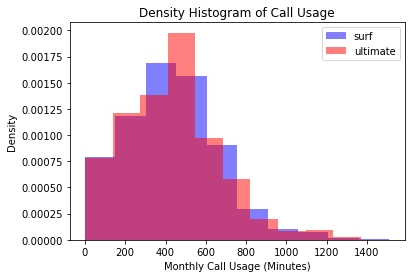

In [57]:
surf_calls = surf_users['call_minutes']
ultimate_calls = ultimate_users['call_minutes']

kwargs = dict(alpha=0.5, density=True)

plt.hist(surf_calls, **kwargs, color='b', label='surf')
plt.hist(ultimate_calls, **kwargs, color='r', label='ultimate')

plt.gca().set(title='Density Histogram of Call Usage', xlabel='Monthly Call Usage (Minutes)', ylabel='Density')
plt.legend();

- Call minutes for each plan have almost the same and similar to normal distribution. 
- Monthly expected call minutes are **under 500 minutes per plan**, although the final plan call limit is **3,000 minutes.** Nobody uses this amount.

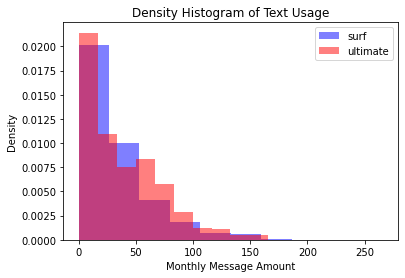

In [58]:
surf_texts = surf_users['text_amount']
ultimate_texts = ultimate_users['text_amount']

kwargs = dict(alpha=0.5, density=True)

plt.hist(surf_texts, **kwargs, color='b', label='surf')
plt.hist(ultimate_texts, **kwargs, color='r', label='ultimate')

plt.gca().set(title='Density Histogram of Text Usage', xlabel='Monthly Message Amount', ylabel='Density')
plt.legend();

* Most users do not use text messages through the telecom operator in either plan. 
- It is normal because there are many online chat apps on mobile phones. 
- Also nobody sends 1000 messages in a month. 
- **The maximum text count is 266** and it's in the 'surf' plan.

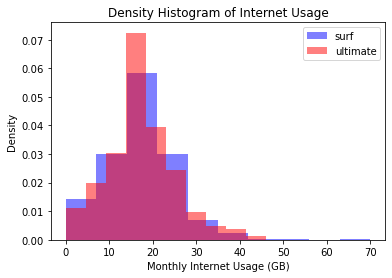

In [59]:
surf_internet = surf_users['monthly_gb']
ultimate_internet = ultimate_users['monthly_gb']

kwargs = dict(alpha=0.5, density=True)

plt.hist(surf_internet, **kwargs, color='b', label='surf')
plt.hist(ultimate_internet, **kwargs, color='r', label='ultimate')

plt.gca().set(title='Density Histogram of Internet Usage', xlabel='Monthly Internet Usage (GB)', ylabel='Density')
plt.legend();

- Internet usage distributions are similar for each plan. 
- **The expected value for internet usage is about 17 GB.**

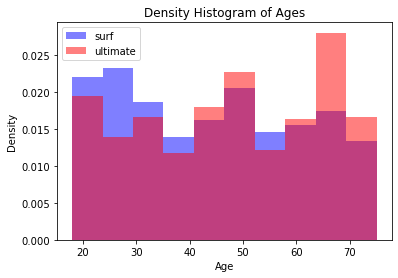

In [60]:
surf_ages = surf_users['age']
ultimate_ages = ultimate_users['age']

kwargs = dict(alpha=0.5, density=True)

plt.hist(surf_ages, **kwargs, color='b', label='surf')
plt.hist(ultimate_ages, **kwargs, color='r', label='ultimate')

plt.gca().set(title='Density Histogram of Ages', xlabel='Age', ylabel='Density')
plt.legend();

- The age distribution is between 18 and 75, and not a normal distribution.

- Now we are going to analyze the **'revenue'** parameters.

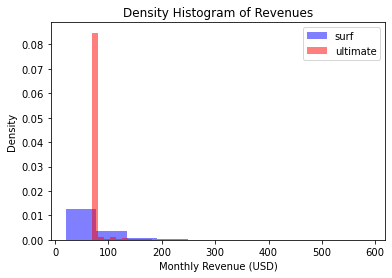

In [61]:
surf_revenues = surf_users['revenue_usd']
ultimate_revenues = ultimate_users['revenue_usd']

kwargs = dict(alpha=0.5, density=True)

plt.hist(surf_revenues, **kwargs, color='b', label='surf')
plt.hist(ultimate_revenues, **kwargs, color='r', label='ultimate')


plt.gca().set(title='Density Histogram of Revenues', xlabel='Monthly Revenue (USD)', ylabel='Density')
plt.legend();

- While the *'call_minutes', 'text_amount', 'monthly_gb', and 'age'* variables are discrete, we can say that **it is the continuous variable for the 'revenue_usd'** and it is dependent on the call, message and internet usages.

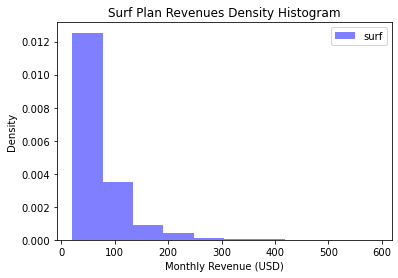

In [62]:
kwargs = dict(alpha=0.5, density=True)

plt.hist(surf_revenues, **kwargs, color='b', label='surf')

plt.gca().set(title='Surf Plan Revenues Density Histogram', xlabel='Monthly Revenue (USD)', ylabel='Density')
plt.legend();

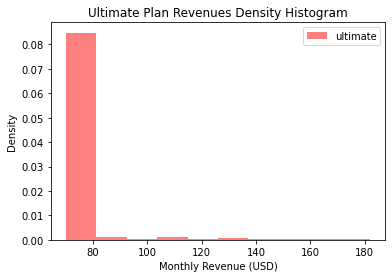

In [63]:
kwargs = dict(alpha=0.5, density=True)

plt.hist(ultimate_revenues, **kwargs, color='r', label='ultimate')

plt.gca().set(title='Ultimate Plan Revenues Density Histogram', xlabel='Monthly Revenue (USD)', ylabel='Density')
plt.legend();

<a id='3.3.'></a>
## 3.3. Step Conclusion

- The ultimate plan revenues are cumulated on the **'70' which is the fixed price**, and there are too few out of this value.
- The surf plan revenues are distributed **from 20 to 250 on the descending density**.
- **The max values are 590 for 'surf' and 182 for 'ultimate' plans.** The excess of the package excess fees have increased the bills paid by 'surf' customers who exceed the limit, while there are minimum out of limit customers in the 'ultimate' package.
- It shows us **the 'ultimate' package limits are too high in terms of company strategy while the 'surf' limits are too low in terms of customers.**
- There are outliers but we will not include detection of them and not drop them, because it's normal human behaviour.

<a id='Step4'></a>
# Step 4. Test the hypotheses

<a id='4.1.'></a>
## 4.1. Hypotheses test by plans

- Let's look at the **'mean', 'std' and 'var'** values of the plans.

In [64]:
mean_surf_revenue = surf_users['revenue_usd'].mean()
variance_surf_revenue = np.var(surf_users['revenue_usd'])
sigma_surf_revenue = surf_users['revenue_usd'].std()

mean_ultimate_revenue = ultimate_users['revenue_usd'].mean()
variance_ultimate_revenue = np.var(ultimate_users['revenue_usd'])
sigma_ultimate_revenue = ultimate_users['revenue_usd'].std()

print("|   Surf   | mean {: <5.2f} | std {: <5.2f} | var {: <6.2f} |".format(mean_surf_revenue, sigma_surf_revenue, variance_surf_revenue))

print("| Ultimate | mean {: <5.2f} | std {: <5.2f} | var {: <7.2f} |".format(mean_ultimate_revenue, sigma_ultimate_revenue, variance_ultimate_revenue))

|   Surf   | mean 60.71 | std 55.39 | var 3065.88 |
| Ultimate | mean 72.31 | std 11.40 | var 129.67  |


<a id='4.1.1.'></a>
### 4.1.1. Levene Test

We will use st.levene method to find the meaning of variance differences. Let's formulate our hypotheses for levene test.

- **H0:** 'The variances of *'surf_users'* and *'ultimate_users'* **are equal.**'
    (var for surf **=** var for ultimate)
- **H1:** 'The variances of *'surf_users'* and *'ultimate_users'* **are different.**' 
    (var for surf **< >** var for ultimate)
- alpha = 0.05

If the p-value is smaller than the alpha, then we assume the variances are different.

In [65]:
alpha = 0.05

results = st.levene(surf_users['revenue_usd'], ultimate_users['revenue_usd'])

print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print("Different variances assumed")
else:
    print("Equal variances assumed")

p-value 5.028876110654919e-83
Different variances assumed


- We assumed the variances are different. 
- Now we will make *t-test.*

<a id='4.1.2.'></a>
### 4.1.2. T-Test

- **H0:** 'The average revenue from users of 'Ultimate and Surf' calling plans **are same.**'
    (µ1 **=** µ2)
- **H1:** 'The average revenue from users of 'Ultimate and Surf' calling plans are **not same.**' 
    (µ1 **< >** µ2)
    
- alpha = 0.05

- We will use the **'scipy.stat.ttest_ind'** to test our hypotheses. 
- The *'equal_var' parameter will be 'False'* since we assumed the variances are different. 
- If the p-value is bigger than the significance level (alpha), we will fail to reject the null hypothesis and assume the same expected values for the next year. Otherwise we will reject the null hypothesis.

In [66]:
alpha = 0.05

results = st.ttest_ind(surf_users['revenue_usd'], ultimate_users['revenue_usd'], equal_var=False)

print("p-value: {}".format(results.pvalue))
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 3.17039054811355e-15
We reject the null hypothesis


- **We reject the null hypothesis because p-value is too small, so it means that the difference statistic is big.** 
- **We assumed the average surf revenue and average ultimate revenue are not same.** 
- In according to our alternative hypothesis, **we assume the expected revenues will be different for the next year.**
- We had found **the mean of the ultimate plan (72.31 USD) is bigger than the mean of the surf plan (60.71 USD)** previously. 
- We can say that **the ultimate plan has bigger expected revenue for the next months.**

<a id='4.2.'></a>
## 4.2. Hypotheses test by region

- Let's look at the customer numbers based on regions and then the statistical values of them.

In [67]:
region_ny_nj = all_tables.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
other_regions = all_tables.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

display(len(region_ny_nj))
display(len(other_regions))

377

1916

In [68]:
print("| NY-NJ         | mean {:.2f} | std {:.2f} | var {:.2f} |".format(region_ny_nj['revenue_usd'].mean(), region_ny_nj['revenue_usd'].std(), np.var(region_ny_nj['revenue_usd'])))

print("| Other regions | mean {:.2f} | std {:.2f} | var {:.2f} |".format(other_regions['revenue_usd'].mean(), other_regions['revenue_usd'].std(), np.var(other_regions['revenue_usd'])))

| NY-NJ         | mean 59.92 | std 43.54 | var 1890.52 |
| Other regions | mean 65.22 | std 47.17 | var 2223.89 |


<a id='4.2.1.'></a>
### 4.2.1. Levene Test

- **H0:** '**The variances** of NY-NJ region revenue and other regions reveune **are equal.**'
    (var for NY-NJ rev. = var for other regions rev.)
- **H1:** '**The variances** of surf_users and ultimate_users **are different.**' 
    (var for NY-NJ rev. < > var for other regions rev.)
- alpha = 0.05

If the p-value is bigger than the alpha, then equal variances assumed.

In [69]:
alpha = 0.05

results = st.levene(region_ny_nj['revenue_usd'], other_regions['revenue_usd'])

print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print("Different variances assumed")
else:
    print("Equal variances assumed")

p-value 0.12580091109612837
Equal variances assumed


- **We assumed the variances are equal.**
- We will make **t-test as 'equal_var = True'**

<a id='4.2.2.'></a>
### 4.2.2. T-Test

- **H0:** 'The average revenue from users in NY-NJ area is **the same with** that of the users from other regions.' 
    (µ1 **=** µ2)

- **H1:** 'The average revenue from users in NY-NJ area is **different from** that of the users from other regions.' 
    (µ1 **< >** µ2)

- alpha = 0.05

- We will also use the same method for t-test, but *equal_var* argument will be True. 
- If the p-value is greater than 0.05, then we can't reject the null hypothesis since the means are close and under the 0.95 significance area in the distribution. 
- Otherwise we will reject the null hypothesis.

In [70]:
alpha = 0.05

region_results = st.ttest_ind(region_ny_nj['revenue_usd'], other_regions['revenue_usd'], equal_var=True)

print("p-value: {}".format(region_results.pvalue))
if (region_results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.043557431621342436
We reject the null hypothesis


- **We reject the null hypothesis**, so we assume that the average revenue from users in NY-NJ area ***is not same with*** the users from other regions. 
- We had found the mean values. **The expected revenue of NY-NJ is 60 USD, while the revenue of other regions is 65 USD.**

<a id='4.3.'></a>
## 4.3. Step Conclusion

- We make **levene test** *for assuming equality of variances* and **t-test** *for assuming equality of means for different two situations*.

- We decided the equality and differency in variances using levene tests.

- We also tested whether two different samples' expected values are different for two different analysis or not. We found the means and mentioned about the expected revenues of the next year. We used for this t-test.

<a id='Step5'></a>
# Step 5. General Conclusion

- The **ultimate plan revenues** are **cumulated on the '70' which is the fixed price**, and there are too few out of this value.
- The **surf plan revenues** are distributed **from 20 to 250** on the descending course.
- **Internet usage distributions** are **similar for each plan.** **The expected value for the internet usage is about 17 GB.**
- Most users do not use text messages through the telecom operator. It is normal because there are many online chat apps on mobile phones. The **maximum text count** is **266 for 'surf' plan.**
- **The max values are 590 minutes for 'surf' and 182 minutes for 'ultimate' plans.** The extra package fees have increased the bills paid by 'surf' customers who exceed the limit, while there are minimum out of limit customers in the 'ultimate' package which pay more than fixed monthly payment.
- We evaluated that the 'ultimate' package limits are too high in terms of company strategy while the 'surf' limits are too low in terms of customers.

#### First Hypothesis Test - Surf Plan Revenue vs. Ultimate Plan Revenue

- H0: 'The average revenue from users of Ultimate and Surf calling plans are same.'
    (µ1 = µ2)
- H1: 'The average revenue from users of Ultimate and Surf calling plans are different.' 
    (µ1 < > µ2)
    
- We used the 'scipy.stat.ttest_ind' to prove our null hypothesis. The 'equal_var' parameter was 'False' because of the result of levene test. 

- We rejected the null hypothesis. We assumed they have different mean values, so we expect that the average surf and average ultimate revenues will be different in the next year in according to our alternative hypothesis.

- **We assume that the ultimate plan will be more profitable than the surf plan in the next year.**

#### Second Hypothesis Test - Region Revenue Comparing

- H0: 'The average revenue from users in NY-NJ area is same from that of the users from other regions.' 
    (µ1 = µ2)

- H1: 'The average revenue from users in NY-NJ area is different from that of the users from the other regions.'
    (µ1 < > µ2)

- We used also the same method for t-test, The 'equal_var' parameter was True because of levene test results. We rejected the null hypothesis, we assumed that the average revenue from users in NY-NJ area will be different than the other region's revenue in the next year.

- **We assume that the expected revenue from NY-NJ will be lower than the expected revenue from other regions.**

#### Recommandations

- It seems like that the ultimate plan has more revenue. So **it's better to focus on the Ultimate Plan to increase overall revenue.**

- NY-NJ area has less expected revenue than the other regions. So **it's better to do more advertising in the NY-NJ area to increase the revenue of this area.**

[Click to go 'Sections'](#Sections)